## 1. Standard Imports

In [1]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
from torch.utils.data import Dataset,DataLoader

In [4]:
import torch 
import torchvision
import torchvision.transforms as T

## 2. Import the data

In [5]:
# import dataset (comes with colab!)
data = pd.read_csv("Mnist_combined.csv", index_col=0)
data = data.to_numpy()

# Extracting only the first 8
labels = data[:8,0]
data   = data[:8,1:]

# normalize the data to a range of [0 1]
# Although T.ToTensor() will internally do the Min-Max scaling
data = data / np.max(data)

# Reshape to 2D!
# number of images : data.shape[0]
# number of input channel : 1
# height : 28
# width :  28
data = data.reshape(data.shape[0],1,28,28)

# check sizes
print(data.shape)
print(labels.shape)

(8, 1, 28, 28)
(8,)


In [6]:
# convert to torch tensor format
dataT   = torch.tensor( data ).float()
labelsT = torch.tensor( labels ).long()

## 3. Create a Custom Dataset class

In [7]:
# My custom dataset class is modeled after the official class
# ??torch.utils.data.TensorDataset

In [8]:
# Inheriting Dataset class
class customDataset(Dataset):
    
    def __init__(self, tensors, transform=None):
        
        # tensors : input as a tuple (data,labels)
        # self.tensors[0] : data 
        # self.tensors[1] : labels 
        
        # check that sizes of data and labels match
        # tensors[0].size(0) : number of rows
        assert all(tensors[0].size(0)==t.size(0) for t in tensors), "Size mismatch between tensors"

        # Assign inputs
        self.tensors   = tensors
        self.transform = transform

    # what to do when someone wants an item from the dataset
    def __getitem__(self, index): 

        # return transformed version of x if there are transforms
        if self.transform:
            
            x = self.transform(self.tensors[0][index])
            
        else:
            x = self.tensors[0][index]

        # return label
        y = self.tensors[1][index]
        
        # return the (data,label) as tuple
        return x,y 

    def __len__(self):
        
        # tensors[0].size(0) : number of rows
        return self.tensors[0].size(0)

## 4. Define Transformations

In [9]:
# Note: several transforms work only on PIL-format data, so it's common to transform
#       to PIL, apply transformations, then transform back to tensor.

# create a list of transforms to apply to the image
imgtrans = T.Compose([ 
                      T.ToPILImage(),
                      T.RandomVerticalFlip(p=.5), # p : probability
                      # T.RandomRotation(90), 
                      T.ToTensor()
                       ])

## 5. DataLoader

In [10]:
# Now convert the data into datasets and then dataloaders

# convert into PyTorch Datasets
# NOTE: we have no test data here, but 
# you should apply the same transformations to the test data

# creating an instance of customDataset class
train_data = customDataset(tensors= (dataT,labelsT),
                           transform=imgtrans)

# translate into dataloader objects
dataLoaded = DataLoader(train_data, batch_size=8, shuffle=False)

In [11]:
type(train_data)

__main__.customDataset

In [12]:
type(dataLoaded)

torch.utils.data.dataloader.DataLoader

## 6. Visualize

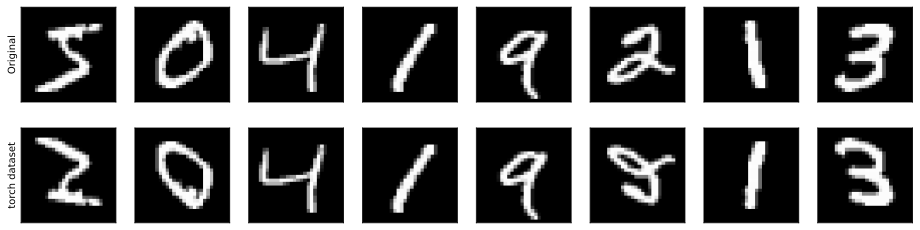

In [13]:
X,y = next(iter(dataLoaded))

# create a figure
fig,axs = plt.subplots(2,8, figsize=(16,4), dpi=135)

# loop over images in the dataset
for i in range(len(X)):

    # draw images
    axs[0,i].imshow(dataT[i,0,:,:].detach(),cmap='gray')
    axs[1,i].imshow(X[i,0,:,:].detach(),cmap='gray')

    # some niceties
    for row in range(2):
        axs[row,i].set_xticks([])
        axs[row,i].set_yticks([])

# row labels
axs[0,0].set_ylabel('Original')
axs[1,0].set_ylabel('torch dataset')

plt.show()

In [14]:
# Important to know: we haven't actually increased the amount of data
len(train_data)

8